# Guide to View Interface Pattern for Compositional Process Discovery


#### Further References:


In [1]:
import pm4py

#### 1. Import the Event Log for Interface Pattern IP-1


In [2]:
# Load the event log
df_log = pm4py.read_xes(
    "/workspaces/university-petri-nets/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_initial_log.xes",
)
display(df_log.head(5))

parsing log, completed traces ::   0%|          | 0/5000 [00:00<?, ?it/s]

,org:resource,concept:name,lifecycle:transition,time:timestamp,case:concept:name
0,Agent 1,t1,complete,2021-03-01 17:07:19+00:00,Trace 1
1,Agent 2,e2,complete,2021-03-01 17:27:30+00:00,Trace 1
2,Agent 2,e1,complete,2021-03-01 17:32:27+00:00,Trace 1
3,Agent 1,t3,complete,2021-03-01 18:54:54+00:00,Trace 1
4,Agent 1,t2,complete,2021-03-01 19:20:48+00:00,Trace 1


In [3]:
# Properties of the event log
# display(df_log.info())
# display(df_log.describe())

In [4]:
# need dateas column and not index, but make sure sorted
df_log = df_log.sort_values("time:timestamp").reset_index(drop=True)

In [5]:
# Some basic statistics
# number of events
print(f"Number of Events: {len(df_log)}")
print(f"Number of Agents: {len(df_log['org:resource'].unique())}")
print(f"Number of Cases: {len(df_log['concept:name'].unique())}")
print(
    f"From {df_log['time:timestamp'].min()} to {df_log['time:timestamp'].max()}. Is Sorted: {df_log['time:timestamp'].is_monotonic_increasing}",
)

Number of Events: 95052
Number of Agents: 2
Number of Traces: 31
From 2021-03-01 17:04:16+00:00 to 2021-03-02 11:09:13+00:00. Is Sorted: True


In [6]:
start_activities = pm4py.get_start_activities(
    df_log,
    activity_key="concept:name",
    case_id_key="case:concept:name",
    timestamp_key="time:timestamp",
)
end_activities = pm4py.get_end_activities(
    df_log,
    activity_key="concept:name",
    case_id_key="case:concept:name",
    timestamp_key="time:timestamp",
)
print(f"Start Activities: {start_activities}")
print(f"End Activities: {end_activities}")


variants = pm4py.get_variants(
    df_log,
    activity_key="concept:name",
    case_id_key="case:concept:name",
    timestamp_key="time:timestamp",
)
print(f"Number of Variants: {len(variants)}")

Start Activities: {'t1': 1658, 'e1': 1650, 'e2': 1692}
End Activities: {'e15': 2492, 'e14': 876, 'e13': 893, 't14': 739}
Number of Variants: 5000


In [17]:
print(f"Length of each trace: {[len(x) for x in df_log]}")

[12, 12, 20, 14, 17]

In [19]:
# activity occurance
display(df_log["concept:name"].value_counts().head())

concept:name
t1    5000
e2    5000
t2    5000
t3    5000
e3    5000
Name: count, dtype: int64

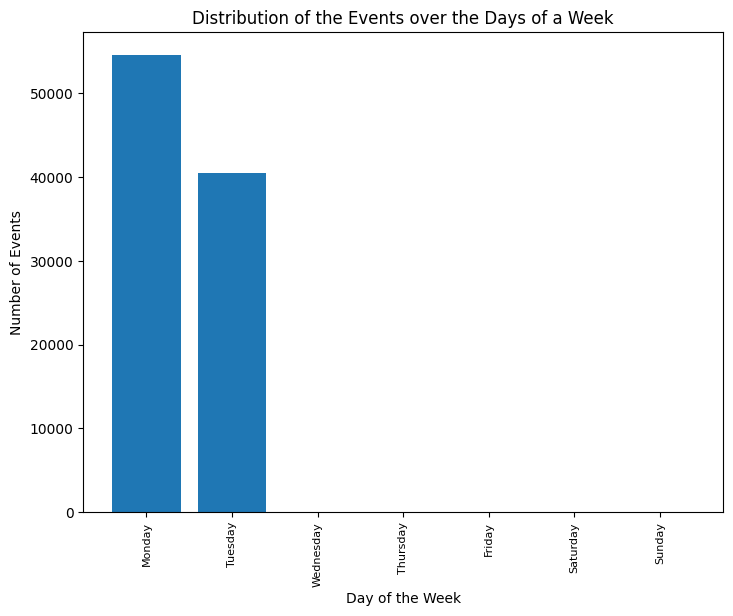

In [20]:
pm4py.view_events_distribution_graph(df_log, distr_type="days_week")

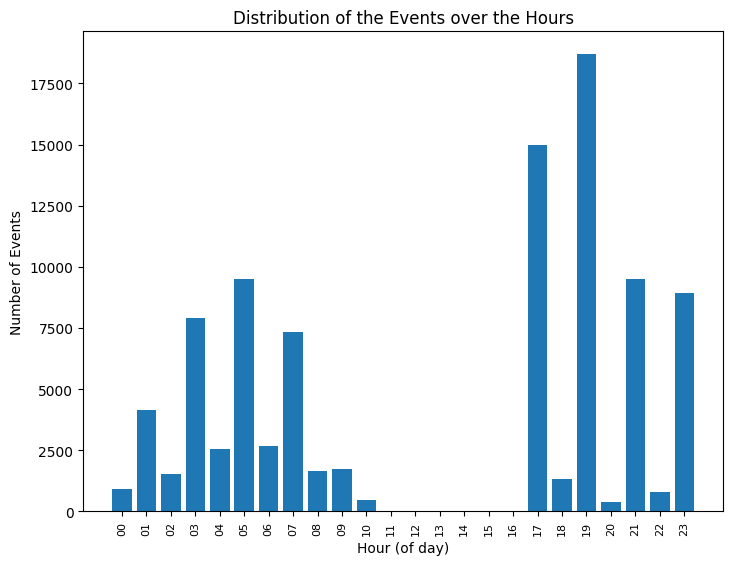

In [21]:
pm4py.view_events_distribution_graph(df_log, distr_type="hours")

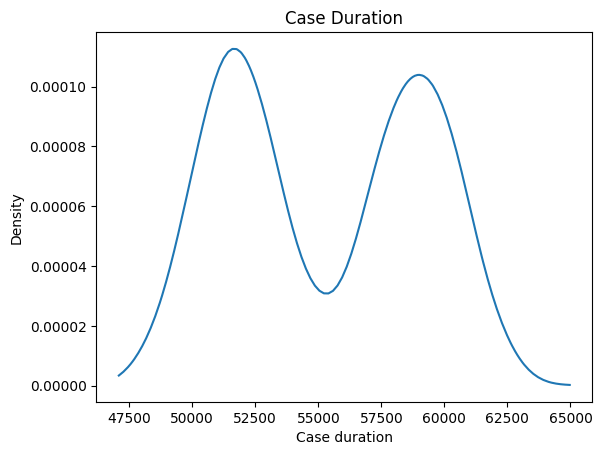

In [22]:
pm4py.view_case_duration_graph(df_log)

#### 2. Get the Petri Nets

/usr/local/lib/python3.12/site-packages/pm4py/objects/petri_net/importer/variants/pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


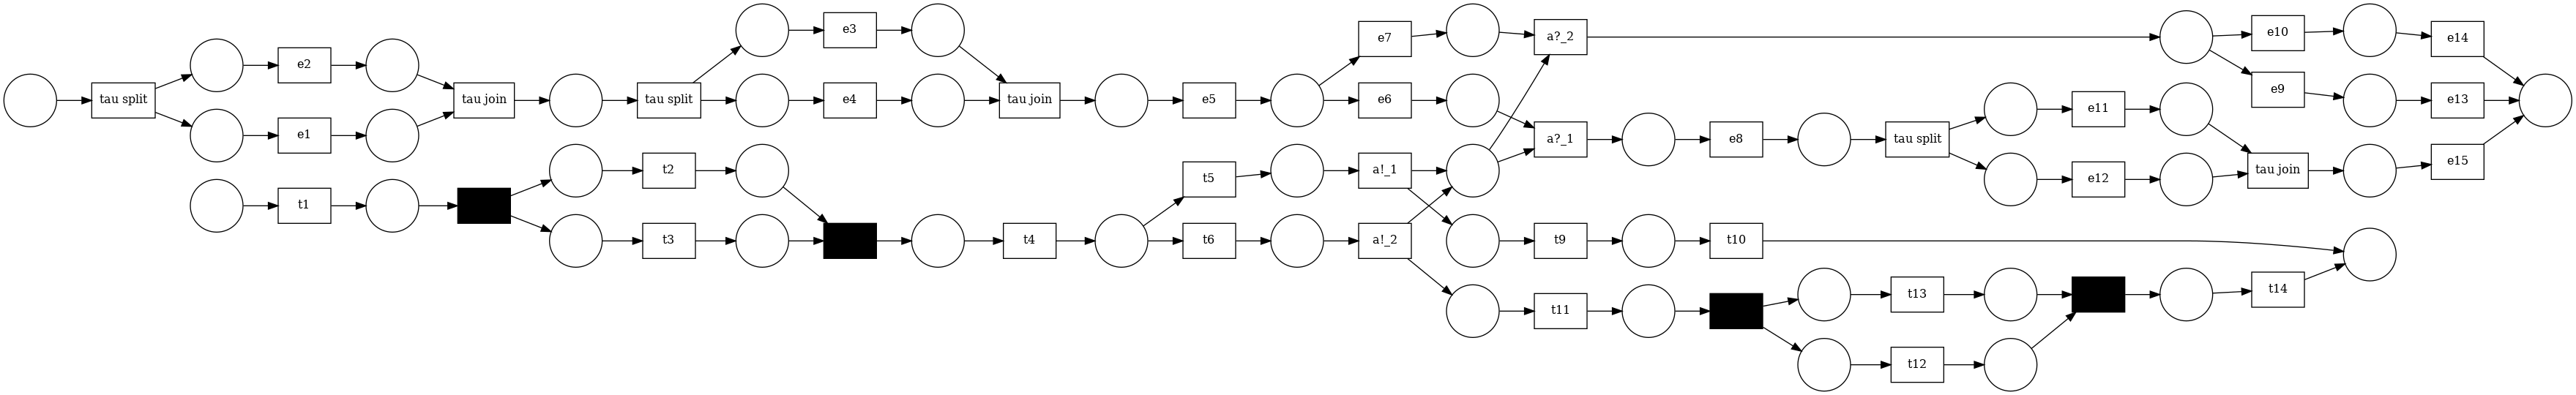

In [7]:
# compositionally mined process model
pn_coposition_mined, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_composition_mined.pnml",
)
pm4py.view_petri_net(pn_coposition_mined)

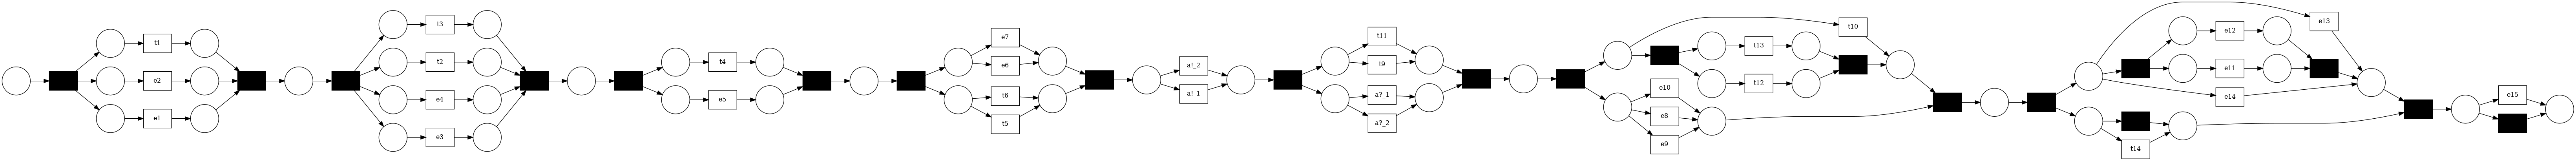

In [8]:
# Directly mined Process model
pn_directly_mined, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_directly_mined.pnml"
)
pm4py.view_petri_net(pn_directly_mined)

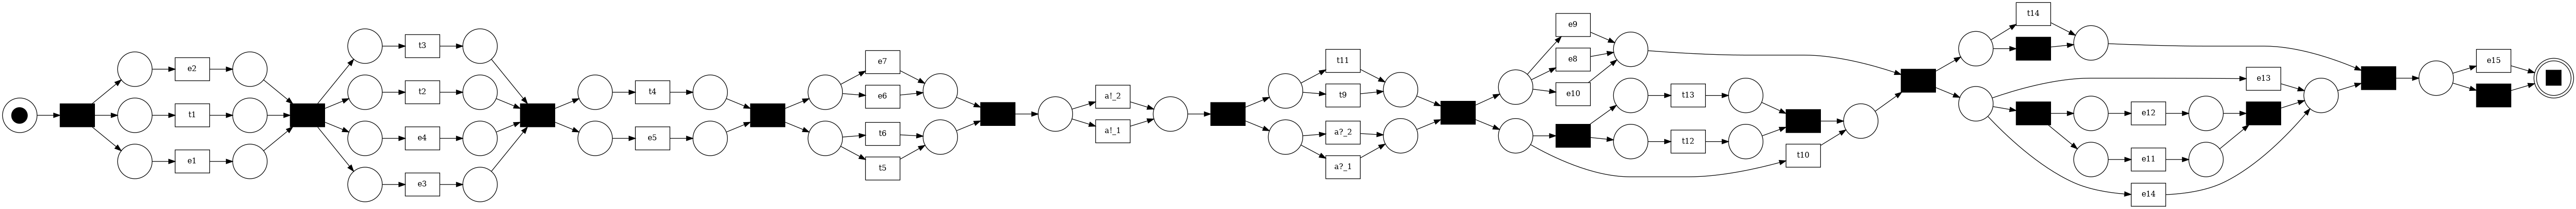

In [9]:
# Directly Mining via PM4Py Inductive Miner
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(df_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

/usr/local/lib/python3.12/site-packages/pm4py/objects/petri_net/importer/variants/pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


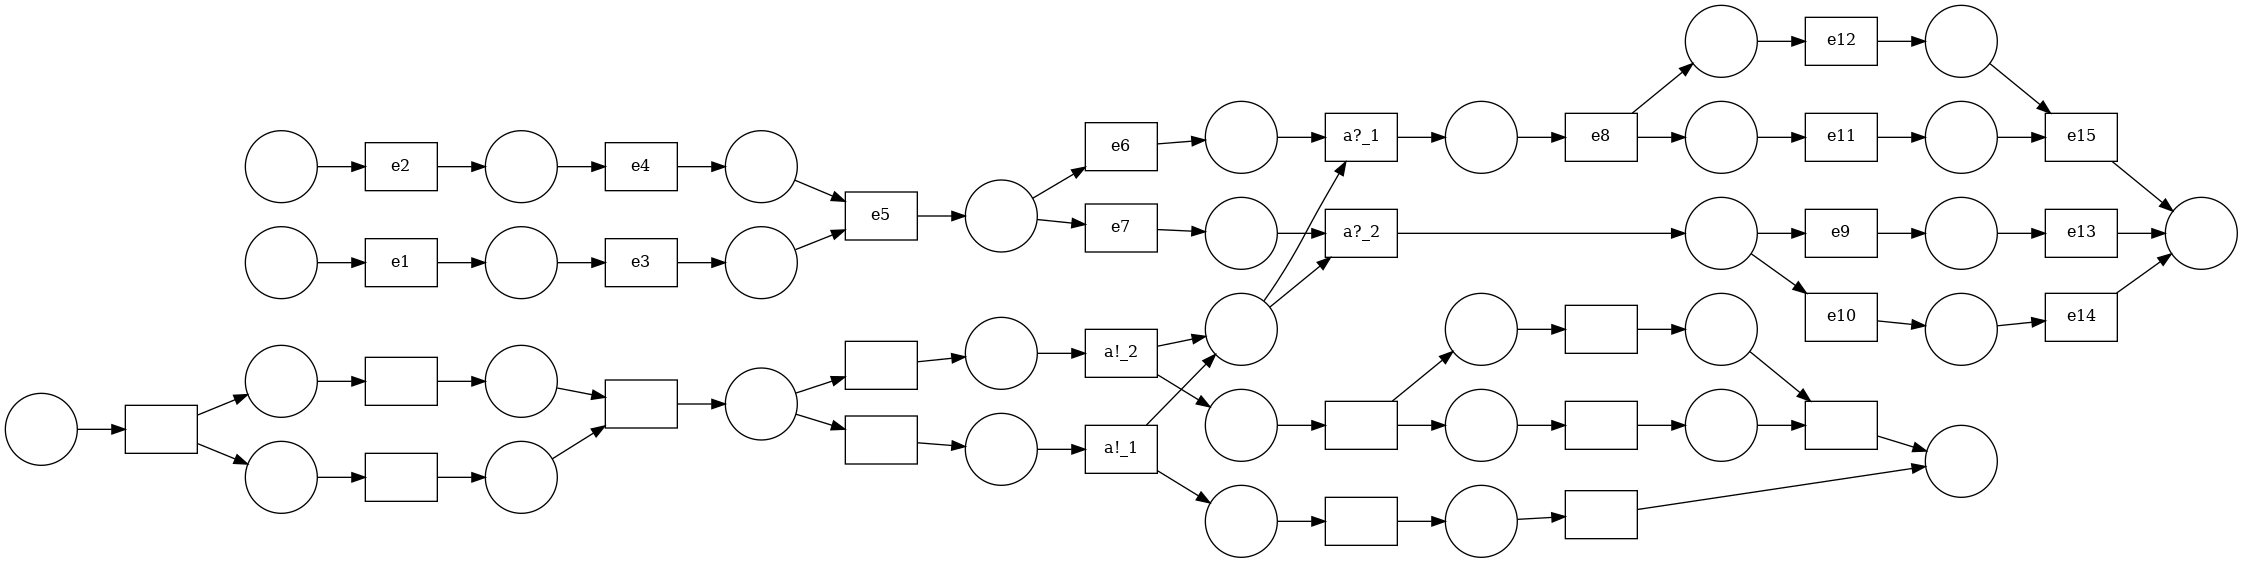

In [10]:
# Reference process model
pn_ref_model, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_ref_model.pnml",
)
pm4py.view_petri_net(pn_ref_model)